In [133]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [103]:
d_train = pd.read_csv("train.csv")
d_test = pd.read_csv("test.csv")

In [104]:
d_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [105]:
d_test.shape

(13564, 17)

In [106]:
d_train.shape

(31647, 18)

In [107]:
d_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [108]:
d_train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [109]:
#dropping unnecessary columns from train data and test data
cleaned_train = d_train.drop(['ID', 'day'], axis=1)
cleaned_test = d_train.drop(['ID', 'day'], axis=1)

In [110]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 16 columns):
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(6), object(10)
memory usage: 3.9+ MB


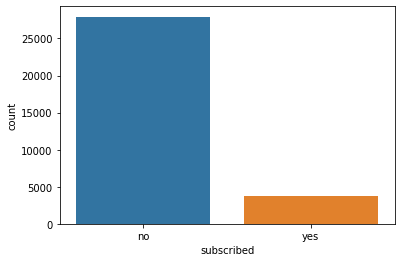

In [111]:
sbn.countplot(cleaned_train.subscribed)

Text(0, 0.5, 'client')

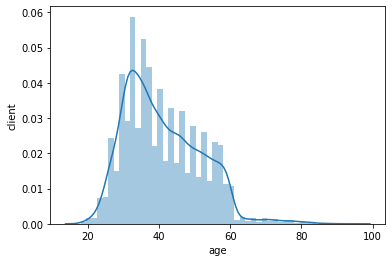

In [112]:
sbn.distplot(cleaned_train.age)
plt.ylabel('client')

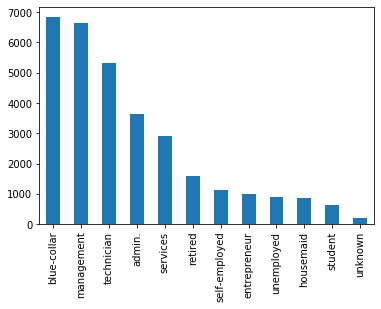

In [113]:
cleaned_train.job.value_counts().plot.bar()

In [115]:
pd.crosstab(cleaned_train.job,cleaned_train.subscribed)

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


In [119]:
#replacing yes with 1 and no with 0
cleaned_train.subscribed.replace('yes',1,inplace=True)
cleaned_test.replace('no',0,inplace=True)

In [120]:
cleaned_train=pd.get_dummies(cleaned_train)

In [124]:
#now every column is of type int so now we can proceed ahead towards traing datasets 
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 51 columns):
age                    31647 non-null int64
balance                31647 non-null int64
duration               31647 non-null int64
campaign               31647 non-null int64
pdays                  31647 non-null int64
previous               31647 non-null int64
subscribed             31647 non-null int64
job_admin.             31647 non-null uint8
job_blue-collar        31647 non-null uint8
job_entrepreneur       31647 non-null uint8
job_housemaid          31647 non-null uint8
job_management         31647 non-null uint8
job_retired            31647 non-null uint8
job_self-employed      31647 non-null uint8
job_services           31647 non-null uint8
job_student            31647 non-null uint8
job_technician         31647 non-null uint8
job_unemployed         31647 non-null uint8
job_unknown            31647 non-null uint8
marital_divorced       31647 non-null uint8
marital_mar

In [126]:
#training model
x = cleaned_train.drop(['subscribed'], axis=1)
y = cleaned_train['subscribed']

In [130]:
#splitting the model into test and train datset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [131]:
#fitting x,y to model
model = LogisticRegression()
model.fit(x,y)

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
y_pred = model.predict(x_test)

In [141]:
#finding model accuracy
accuracy = accuracy_score(y_pred,y_test)

In [142]:
print("Model Accuracy =", accuracy)

Model Accuracy = 0.9039494470774092
